In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm, tree
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score

In [114]:
df1 = pd.read_csv("df_csv/data_2018.csv")
df2 = pd.read_csv("df_csv/data_2019.csv")
df3 = pd.read_csv("df_csv/data_2020.csv")

df18=df1.copy()
df19=df2.copy()
df20=df3.copy()

In [115]:
print(df1.head())
print()
print(df2.head())
print()
print(df3.head())

   sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K  Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            C2S1      -1

In [116]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [117]:
df3.drop("Unnamed: 8",axis=1, inplace = True)

In [118]:
# for i in df1.columns :
#     print(df1[i].unique())
# for i in df2.columns :
#     print(df2[i].unique())
# for i in df3.columns :
#     print(df3[i].unique())

In [119]:
for i in range (len(df1.columns)):
    if df1.columns[i] != df2.columns[i] != df3.columns[i] :
        print(f"différence a la colonne {i} {df1.columns[i]} {df2.columns[i]} {df3.columns[i]}")

différence a la colonne 9 E.C EC E.C
différence a la colonne 11 CO3 CO_-2  CO3
différence a la colonne 12 HCO3 HCO_ -  HCO3
différence a la colonne 13 Cl Cl - Cl
différence a la colonne 14 F F - F
différence a la colonne 15 NO3  NO3-  NO3 
différence a la colonne 16 SO4 SO4-2 SO4
différence a la colonne 17 Na Na+ Na
différence a la colonne 18 K K+ K
différence a la colonne 19 Ca Ca+2 Ca
différence a la colonne 20 Mg Mg+2 Mg


In [120]:
df2.columns = df1.columns

In [121]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [122]:
print(df.shape)
df.info()

(1106, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               1106 non-null   int64  
 1   district          1106 non-null   object 
 2   mandal            1106 non-null   object 
 3   village           1106 non-null   object 
 4   lat_gis           1106 non-null   float64
 5   long_gis          1106 non-null   float64
 6   gwl               1095 non-null   float64
 7   season            1106 non-null   object 
 8   pH                1106 non-null   object 
 9   E.C               1106 non-null   int64  
 10  TDS               1106 non-null   float64
 11  CO3               946 non-null    float64
 12  HCO3              1106 non-null   float64
 13  Cl                1106 non-null   int64  
 14  F                 1106 non-null   float64
 15  NO3               1106 non-null   float64
 16  SO4               1106 non-null

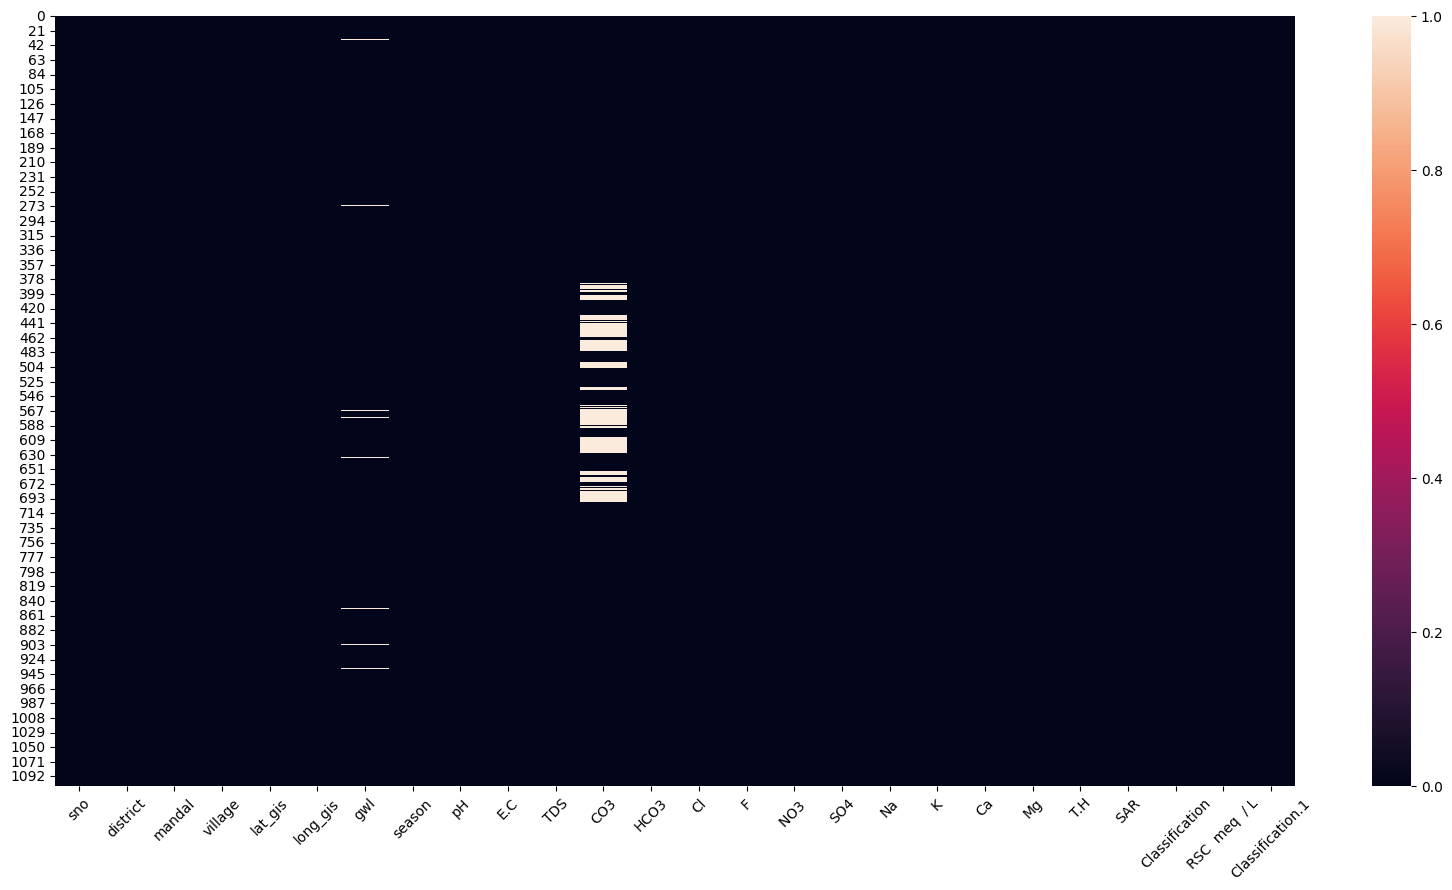

In [123]:
plt.figure(figsize=(20,10))     
sns.heatmap(df.isna()) 
plt.xticks(rotation=45)   
plt.show()

In [124]:
valeur_remplacement = {
    "C2S1":"Moderate",
    "C3S1":"Poor",
    "C4S2":"Bad",
    "C4S1":"Bad",
    "C3S2":"Poor",
    "C4S4":"Bad",
    "C4S3":"Bad",
    "C1S1":"Good",
    "C3S4":"Bad",
    "C3S3":"Poor",
    "C2S2":"Moderate"}
df['Classification'] = df['Classification'].replace(valeur_remplacement, regex=True)
df = df[~df["Classification"].isin(["OG", "O.G"])]

In [125]:
df['Classification'].value_counts()

Classification
Poor        714
Moderate    249
Bad         136
Good          3
Name: count, dtype: int64

In [126]:
categorical_columns = ['Classification', 'district', 'mandal', 'village', 'season', 'Classification.1']

label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

In [127]:
df['pH'] = df['pH'].str.replace("'", "").str.replace("..", ".").astype(float)

In [128]:
label_pH = LabelEncoder()
df['pH'] = label_pH.fit_transform(df['pH'])

<Axes: >

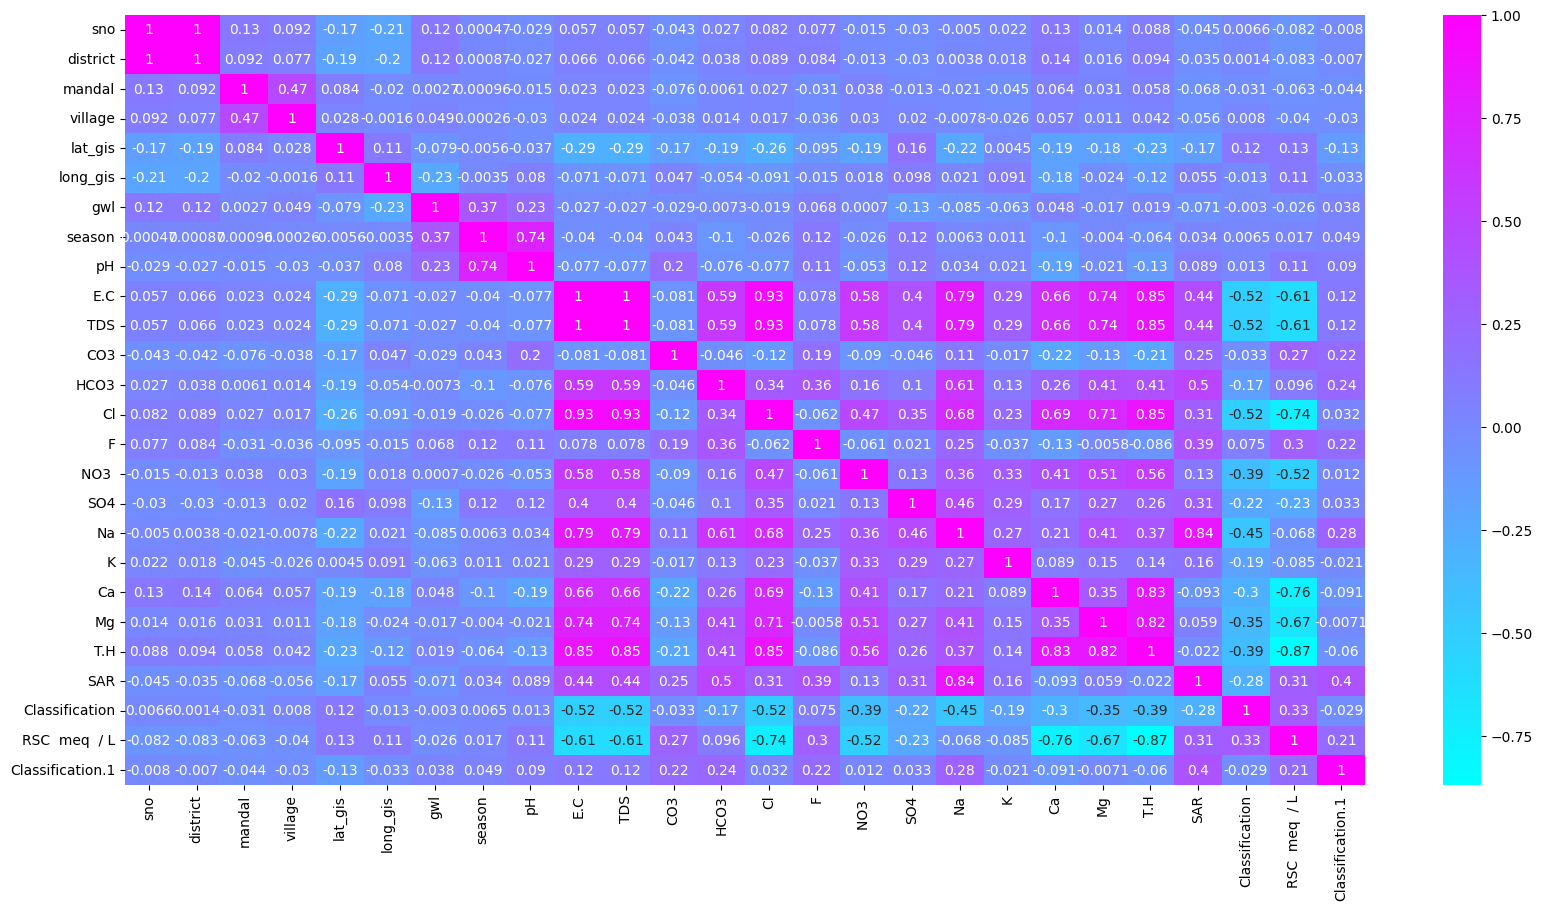

In [129]:
# Correlations
# Select only numeric features
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
# Display correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='cool')

sélection des 10 colonnes en plus de la targt :

In [130]:
correlation_matrix = df.corr()
correlation_matrix["Classification"].sort_values()

Cl                 -0.516491
TDS                -0.515528
E.C                -0.515528
Na                 -0.449197
T.H                -0.393487
NO3                -0.388473
Mg                 -0.352239
Ca                 -0.295902
SAR                -0.279272
SO4                -0.222173
K                  -0.188540
HCO3               -0.166101
CO3                -0.032646
mandal             -0.030751
Classification.1   -0.029074
long_gis           -0.013318
gwl                -0.003031
district            0.001361
season              0.006484
sno                 0.006567
village             0.007958
pH                  0.012824
F                   0.074699
lat_gis             0.119392
RSC  meq  / L       0.330860
Classification      1.000000
Name: Classification, dtype: float64

In [131]:
df = df[['E.C', 'TDS', 'Cl', 'NO3 ', 'Na', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L','Classification']]
print(df.shape)
df.head()

(1102, 11)


,E.C,TDS,Cl,NO3,Na,Ca,Mg,T.H,SAR,RSC meq / L,Classification
0,745,476.80,60,42.276818,49.0,48.0,38.896,279.934211,1.273328,-1.198684,2
1,921,589.44,80,100.659091,42.0,56.0,63.206,399.893092,0.913166,-3.397862,3
2,510,326.40,30,41.471545,45.0,24.0,38.896,219.934211,1.319284,-0.398684,2
3,422,270.08,10,10.669864,27.0,32.0,19.448,159.967105,0.928155,0.000658,2
4,2321,1485.44,340,128.843636,298.0,56.0,92.378,519.843750,5.682664,-4.396875,0


In [132]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())


8
0


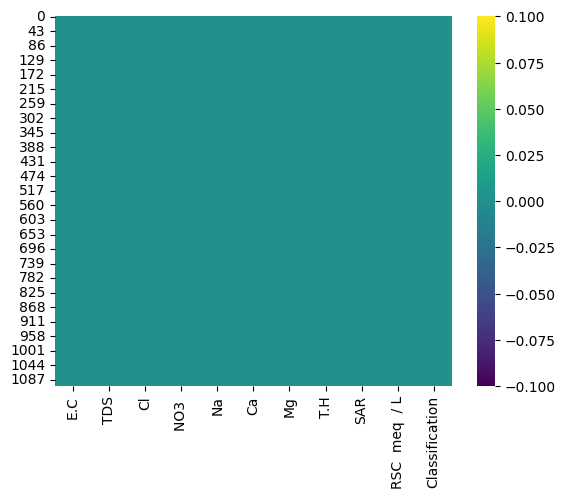

In [133]:
sns.heatmap(df.isna(), cmap='viridis')
plt.show()

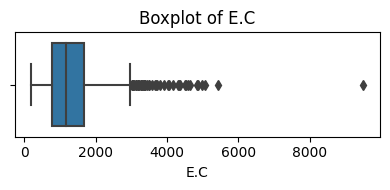

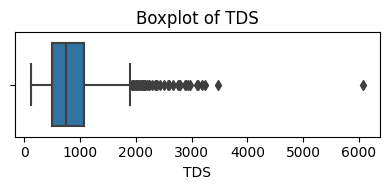

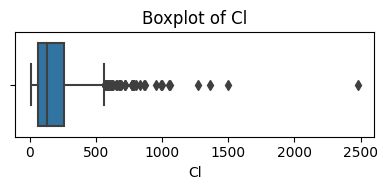

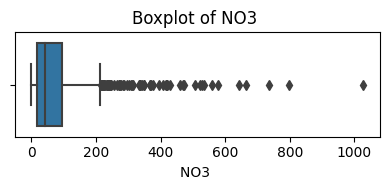

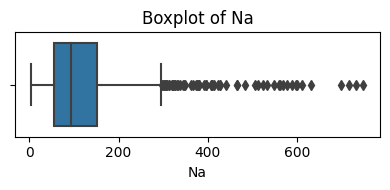

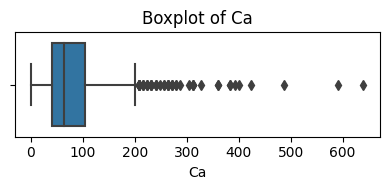

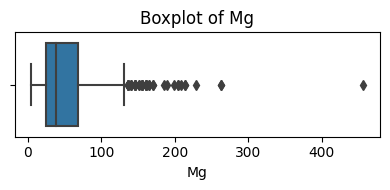

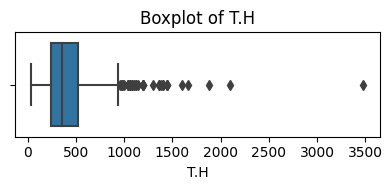

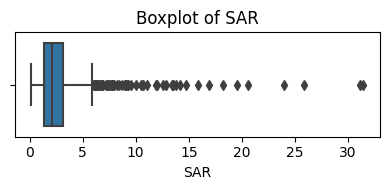

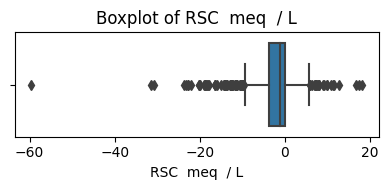

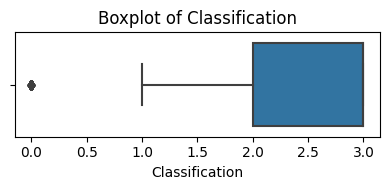

In [134]:
for column in df:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

In [135]:
features = [col for col in df.columns if col != "Classification"]
print(features)

['E.C', 'TDS', 'Cl', 'NO3 ', 'Na', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L']


In [136]:
def impute_outliers(data,feature) :
    q1 = np.percentile(data[feature], 25)
    q3 = np.percentile(data[feature], 75)
    iqr= q3-q1 
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

for feature in features :
    impute_outliers(df, feature)

In [137]:
df.shape

(1094, 11)

# et la on commence les modèles :

In [138]:
def matrice_et_stats(y_test, y_prediction):
    evaluation = {}
    evaluation['accuracy'] = accuracy_score(y_test, y_prediction)
    evaluation['precision'] = precision_score(y_test, y_prediction, average='weighted', zero_division=1)
    evaluation['rappel'] = recall_score(y_test, y_prediction, average='weighted', zero_division= 1)
    evaluation['f1_score'] = f1_score(y_test, y_prediction, average='weighted')
    return evaluation

In [139]:
def moyenne_dictionnaires(liste_dictionnaires):
    accuracy=0
    precision=0
    rappel=0
    f1_score=0

    for dict in liste_dictionnaires:
        accuracy+=dict['accuracy']
        precision+=dict['precision']
        rappel+=dict['rappel']
        f1_score+=dict['f1_score']
    return {'accuracy':100*accuracy/len(liste_dictionnaires), 'precision':100*precision/len(liste_dictionnaires), 'rappel':100*rappel/len(liste_dictionnaires), 'f1_score':100*f1_score/len(liste_dictionnaires)}

In [143]:
X = df.drop(['Classification'], axis=1)
y = df['Classification']
kfold = KFold(n_splits=5, shuffle=True, random_state = 12)

knn_evaluation = []
svm_evaluation = []
tree_evaluation = []
rf_evaluation = []
xgb_evaluation = []
nn_evaluation = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    
    knn_model = KNeighborsClassifier(n_neighbors=7)
    knn_model.fit(X_train, y_train)
    y_prediction = knn_model.predict(X_test)
    knn_evaluation.append(matrice_et_stats(y_test, y_prediction))

    svm_model = svm.SVC()
    svm_model.fit(X_train, y_train)
    y_prediction = svm_model.predict(X_test)
    svm_evaluation.append(matrice_et_stats(y_test, y_prediction))

    tree_model = tree.DecisionTreeClassifier()
    tree_model.fit(X_train, y_train)
    y_prediction = tree_model.predict(X_test)
    tree_evaluation.append(matrice_et_stats(y_test, y_prediction))

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_prediction = rf_model.predict(X_test)
    y_prediction = np.round(y_prediction)
    rf_evaluation.append(matrice_et_stats(y_test, y_prediction))

    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_prediction = xgb_model.predict(X_test)
    y_prediction = np.round(y_prediction)
    xgb_evaluation.append(matrice_et_stats(y_test, y_prediction))
    
    nn_model = MLPClassifier(max_iter= 1200)
    nn_model.fit(X_train, y_train)
    y_prediction = nn_model.predict(X_test)
    nn_evaluation.append(matrice_et_stats(y_test, y_prediction))

knn_evaluation=moyenne_dictionnaires(knn_evaluation)
svm_evaluation=moyenne_dictionnaires(svm_evaluation)
tree_evaluation=moyenne_dictionnaires(tree_evaluation)
rf_evaluation=moyenne_dictionnaires(rf_evaluation)
xgb_evaluation=moyenne_dictionnaires(xgb_evaluation)
nn_evaluation=moyenne_dictionnaires(nn_evaluation)


evaluation = pd.DataFrame([knn_evaluation, svm_evaluation, tree_evaluation, rf_evaluation, xgb_evaluation, nn_evaluation]).round(2)
evaluation.index = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'Réseau de neuronnes']
evaluation

,accuracy,precision,rappel,f1_score
KNN,94.24,94.34,94.24,94.05
SVM,95.70,95.79,95.70,95.58
Decision Tree,98.99,99.12,98.99,99.03
Random Forest,99.45,99.46,99.45,99.31
XGBoost,99.45,99.46,99.45,99.31
Réseau de neuronnes,96.80,96.90,96.80,96.68
